# Exercício 1 - POS TEC. DISRUPTIVAS
# Assuntos: PCA, K-Means, HAC

### Escreva aqui o seu nome completo e turma:

## Priscila Veiga - Tecnologias Disruptivas 1/2019

## Para resolver este exercício usaremos o dataset *Breast Cancer Wisconsin* que pode ser baixado do seguinte link do *kaggle*: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

A distribuição das features dos dados segue explicada abaixo:

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) <br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br>

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

* Essas informações sobre o dataset foram retiradas do *kaggle*.

## A) Como podemos observar, carregando o dataset (sendo salvo como *dataset_breast_cancer.csv*), a última coluna do mesmo deve ser excluída (*dropped*), pois nenhuma linha tem valor. Temos uma coluna que indica o paciente [id] com tumor maligno ou não e a coluna [*diagnosis*] que é um rótulo, afirmando que a pessoa possui tumor maligno (M) ou benigno (B). Consiferando que desejamos utilizar técnicas não supervisionadas de *machine learning* para classificar/agrupar os pacientes do *dataset* em questão entre pacientes com tumor maligno ou benigno,  responda os itens subsequentes:

In [541]:
import pandas as pd

In [542]:
df = pd.read_csv('dataset_breast_cancer.csv')

### A.1) Quantas colunas realmente serão consideradas *features* para o nosso problema?

In [543]:
df.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Resposta: 16 

### A.2) Uma vez que possuimos um número de *features* superior a 3, como poderíamos visualizar os pontos de dados? Que técnica você utilizaria?

In [545]:
features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
x = df.loc[:, features].values
y = df.loc[:,['diagnosis']].values

In [546]:
df.shape

(569, 33)

In [547]:
principal_df.shape

(569, 5)

In [548]:
x.shape

(569, 17)

In [549]:
y.shape

(569, 1)

In [550]:
### A.3) Aplique o PCA nas *features* originas e reduza os dados para um espaço 3D:

- Bibliotecas que você poderá precisar:

In [551]:
import numpy as np
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

- Preparar os dados:

- Use o <b>iloc</b> do pandas dataframe pra selecionar somentes as colunas de interesse:

In [552]:
new_df = principal_df.iloc[:, 2:17].values

In [553]:
new_df

array([[-3.375478107551985, 1, 'M'],
       [-1.0889697420551259, 1, 'M'],
       [-0.8101507511836712, 1, 'M'],
       ...,
       [2.1649391290290843, 1, 'M'],
       [1.820321768626603, 1, 'M'],
       [2.804142575358607, 0, 'B']], dtype=object)

-  Vamos aplicar a normalização com a função da biblioteca scikit-learn StandardScaler:

In [554]:
scaler = StandardScaler().fit(x)

In [555]:
x = scaler.transform(x)

- Agora, vamos projetar os dados em três dimensões usando o PCA:

In [556]:
pd.DataFrame(data = x, columns = features).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [557]:
pca = PCA(n_components=3)

In [558]:
compressor = pca.fit(x)

In [559]:
principal_components = compressor.transform(x)

### A.4) Plote a distribuição dos pontos do PCA com as duas classes:

- Guarde as componentes principais em um dataframe, chamado <b>principal_df</b>, com as colunas *principal component 1*, *principal component 2* e *principal component 3*:

In [560]:
# principal_df = pd.DataFrame...(data = principal_components

In [561]:
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


- Concatene as colunas de atributo (agora componentes principais) com a coluna de rótulo e guarde o dataframe resultante em um varável chamada <b>new_df</b>:

In [562]:
principal_df.head()

,principal component 1,principal component 2,principal component 3
0,7.279257,2.416364,-3.375478
1,2.292694,-2.988848,-1.088970
2,4.965261,-0.631846,-0.810151
3,6.322478,8.747723,0.181236
4,2.954301,-2.144121,-2.842480


In [605]:
pca_df = pd.concat([principal_df, df[['diagnosis']]], axis = 1)
pca_df.head(5)

,principal component 1,principal component 2,principal component 3,k_means,diagnosis,diagnosis
0,7.279257,2.416364,-3.375478,1,M,M
1,2.292694,-2.988848,-1.088970,1,M,M
2,4.965261,-0.631846,-0.810151,1,M,M
3,6.322478,8.747723,0.181236,1,M,M
4,2.954301,-2.144121,-2.842480,1,M,M


- Agora execute as células abaixo para obter o plot 3D das três componentes principais:

In [564]:
from mpl_toolkits.mplot3d import Axes3D

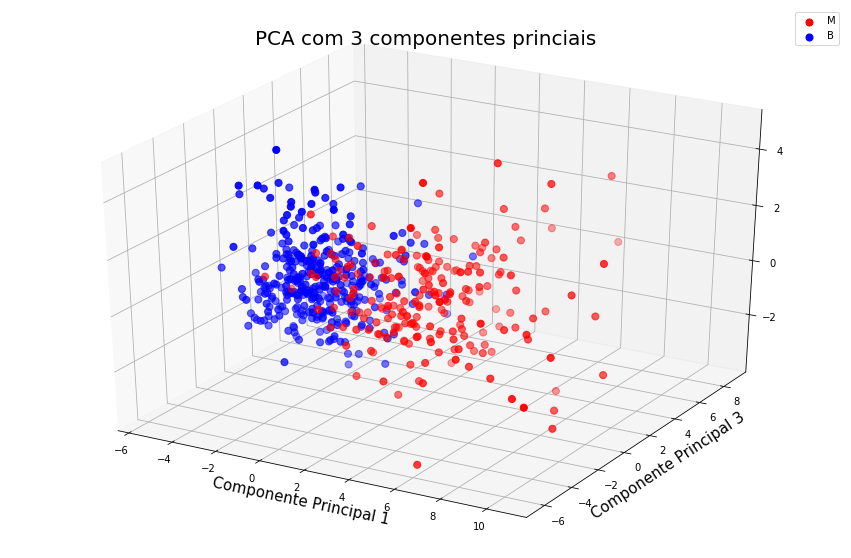

In [606]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_ylabel('Componente Principal 3', fontsize = 15)
ax.set_title('PCA com 3 componentes princiais', fontsize = 20)


target = ['M', 'B']
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = new_df['diagnosis'] == target
    ax.scatter(new_df.loc[indices_to_keep, 'principal component 1']
               , pca_df.loc[indices_to_keep, 'principal component 2']
               , pca_df.loc[indices_to_keep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### A.5) Observando o Plot anterior, é possível observar duas nuvens de pontos distintas para as duas categorias?

In [608]:
new_df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

## B) Aplique o o *K-means* nas componentes principais usando *K*=2 apesar de ser uma técnica não supervisionada, apenas para analisarmos se faz sentido com a existência de 2 classes conhecidas *a priori* nesse conjunto de dados (pacientes com tumores malignos (M) e com tumores benignos (B)). Compare os agrupamentos dos plots do item A.4 com o plot gerado a partir do *K-means* com *K*=2.

In [567]:
from sklearn.cluster import KMeans

- importando o *K-means* do scikit-learn:

In [568]:
kmeans_model = KMeans(n_clusters=2)

In [569]:
kmeans_model.fit(principal_df)

KMeans(n_clusters=2)

### B.1) Treine o *k-means* usando o dataframe correto criado no item A, sabendo que o *k-means* é um algoritmo de *machine learning* não supervisionado: 

In [570]:
principal_df ['k_means'] = kmeans_model.predict(principal_df)

In [571]:
principal_df ['diagnosis'] = new_df['diagnosis']

### B.2) Agora plote os pontos de acordo com os dois clusters gerados pelo *k-means* e compare com o do item A.4:

/usr/lib/python3/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'K_Means')

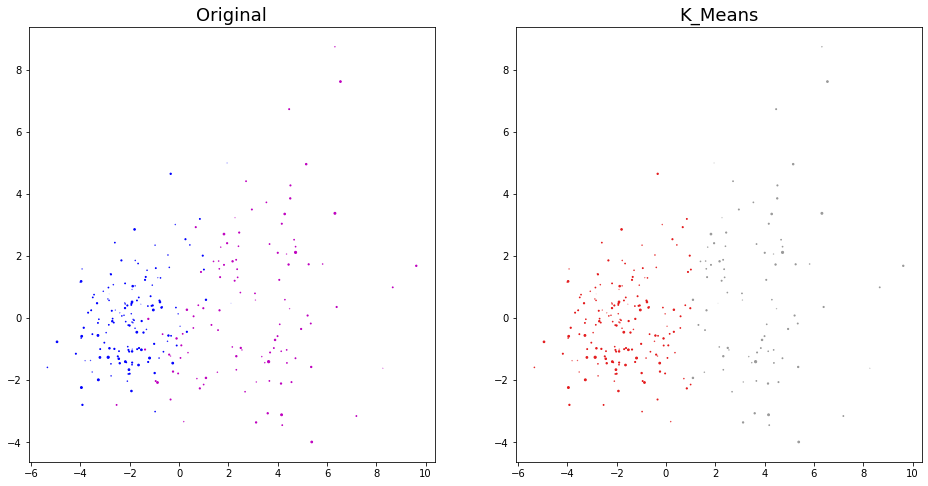

In [572]:
fig, axes = plt.subplots(1, 2, figsize=(16,8)) 
axes[0].scatter(principal_df['principal component 1'], principal_df['principal component 2'], principal_df['principal component 3'], c=principal_df['diagnosis'])
axes[1].scatter(principal_df['principal component 1'], principal_df['principal component 2'], principal_df['principal component 3'], c=principal_df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Original', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

 - Replote do item A.4:

Text(0.5, 0.92, 'Original')

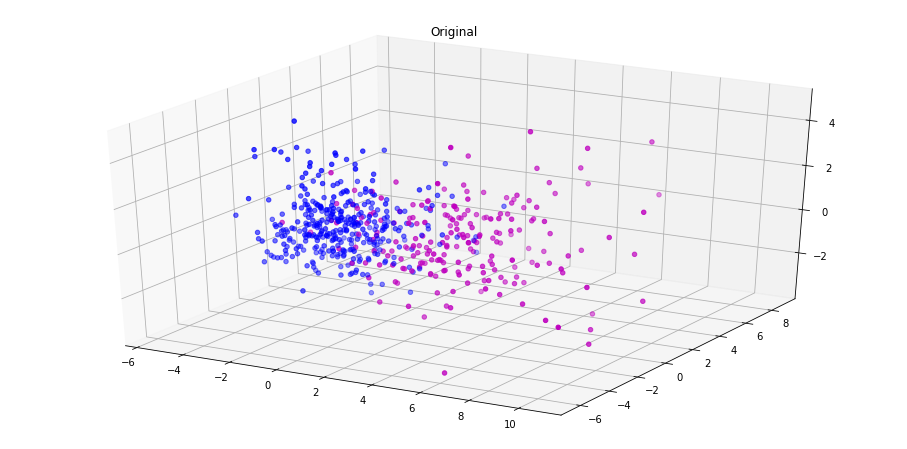

In [573]:
fig1 = plt.figure(figsize=(16, 8))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(principal_df['principal component 1'], principal_df['principal component 2'], principal_df['principal component 3'], c=principal_df['diagnosis'])
ax1.set_title('Original')

- Plot do k-means:

Text(0.5, 0.92, 'K_Means')

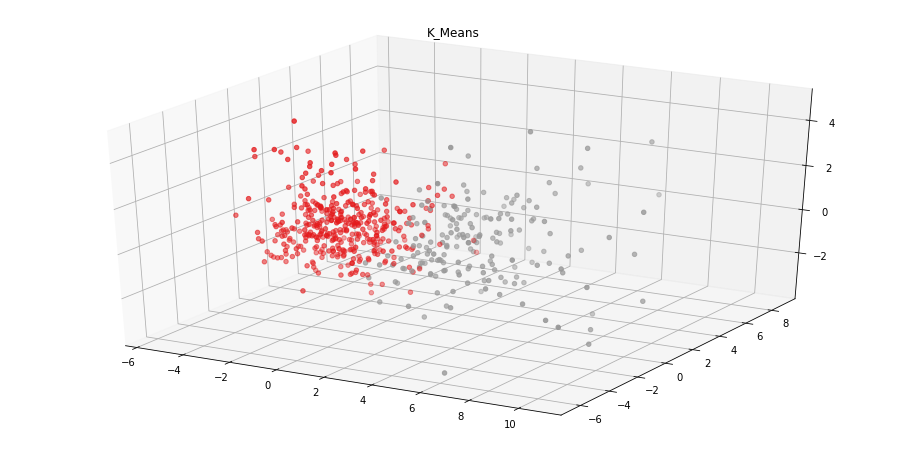

In [574]:
fig2 = plt.figure(figsize=(16, 8))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(principal_df['principal component 1'], principal_df['principal component 2'], principal_df['principal component 3'], c=principal_df['k_means'], cmap=plt.cm.Set1)
ax2.set_title('K_Means')

-  Discuta nas células abaixo se há semelhanças entre os dois plots no que se refere aos dois *clusters*. Pode também fazer uma comparação entre os rótulos originais no dataframe original e os rótulos obtidos com o *K-means*:

##### Resposta: O kmeans foi o que mais se aproximou do resultado original. O PCA deixou de fora os pontos mais altos e distantes de x e y

### B.3) Faça a regra do cotovelo para os valores de k iguais a 1 a 6 e verifique se k=2 foi realmente o ideal para a melhor clusterização do *k-means*:

In [576]:
distortions_J = []

In [599]:
Sum_of_squared_distances = []
K = range(1,7) # varia de 1 a 6
for k in K:
    kmean_model = KMeans(n_clusters=k) # instancia o objeto do scikit-learn kmeans
    kmean_model.fit(principal_df.drop(columns=['k_means', 'diagnosis'])) # treina nos dados
    distortions_J.append(kmean_model.inertia_) # apenda em uma lista das distorções
    Sum_of_squared_distances.append(kmean_model.inertia_)

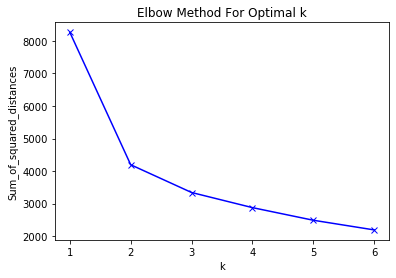

In [600]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## C) Aplique a Clusterização Hierárquica Aglomerativa nas componentes principais, escolha o melhor número de clusters baseado na regra do dendograma e plot os clusters para comparar com o gerado no item A.4.

- importando bibliotecas necesárias para o HCA:

In [601]:
import scipy.cluster.hierarchy as shc # Para criar o dendograma
from sklearn.cluster import AgglomerativeClustering # Para treinar o HCA

### C.1) Crie o dendograma com método de linkage de seu interesse (aquele que melhor dividir os clusters):

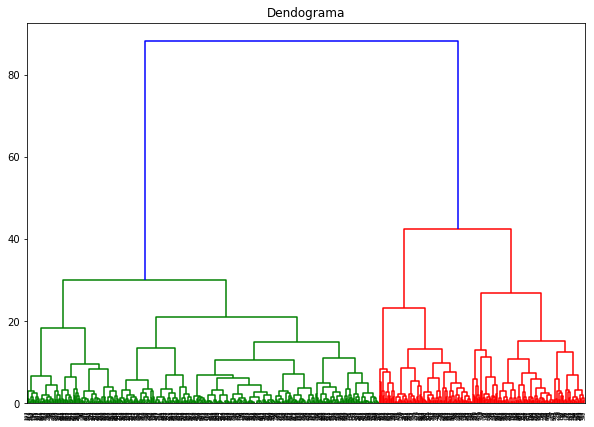

In [603]:
plt.figure(figsize=(10, 7))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(principal_df.drop(columns=['k_means', 'diagnosis']), method='ward'))

### C.2) Qual o valor de *k* para o dendograma obtido?

##### Resposta: 

### C.3) Plote o cluster formado pelo seu dendograma e compare com o cluster do item A.4. Discuta se há semelhanças entre as separações origianal e a gerada pelo HCA, ou se o HCA na verdade separou em dois grupos, mas pode estar se referindo a outras características dos dados.

In [611]:
cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward') # mesmo tipo de linkage usado no dendograma

cluster.fit_predict(pca_df.drop(columns=['k_means', 'diagnosis']))

array([4, 3, 3, 4, 3, 2, 3, 2, 2, 4, 1, 2, 3, 1, 4, 4, 1, 4, 3, 0, 0, 0,
       2, 3, 3, 2, 4, 1, 4, 3, 3, 2, 3, 3, 2, 2, 2, 0, 0, 2, 1, 2, 3, 2,
       2, 2, 0, 2, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 0, 0, 0, 0, 4, 0, 2, 2,
       0, 0, 2, 0, 3, 0, 4, 2, 0, 1, 0, 2, 4, 0, 0, 2, 5, 3, 0, 3, 1, 3,
       0, 2, 1, 1, 0, 0, 2, 3, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 5, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 4, 1, 0, 3, 5, 0, 0, 0, 1, 1, 2, 3, 0, 2,
       2, 0, 3, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 3, 1, 0, 0, 0, 3, 3, 0, 3, 1, 0, 1, 3, 0, 0, 1, 2, 0, 0, 0,
       0, 2, 0, 0, 5, 4, 2, 0, 2, 0, 1, 0, 0, 0, 4, 1, 0, 2, 2, 0, 2, 1,
       3, 2, 0, 3, 5, 4, 0, 2, 0, 1, 2, 0, 3, 0, 5, 1, 2, 2, 0, 0, 3, 3,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0, 1, 5, 3, 1, 3, 0, 0,
       2, 1, 3, 0, 1, 2, 1, 0, 5, 0, 4, 3, 3, 2, 3, 2, 4, 4, 3, 1, 1, 1,
       3, 3, 0, 1, 0, 0, 0, 0, 5, 0, 1, 0, 0, 1, 1, 0, 3, 0, 3, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3,

Text(0.5, 0.92, 'HCA')

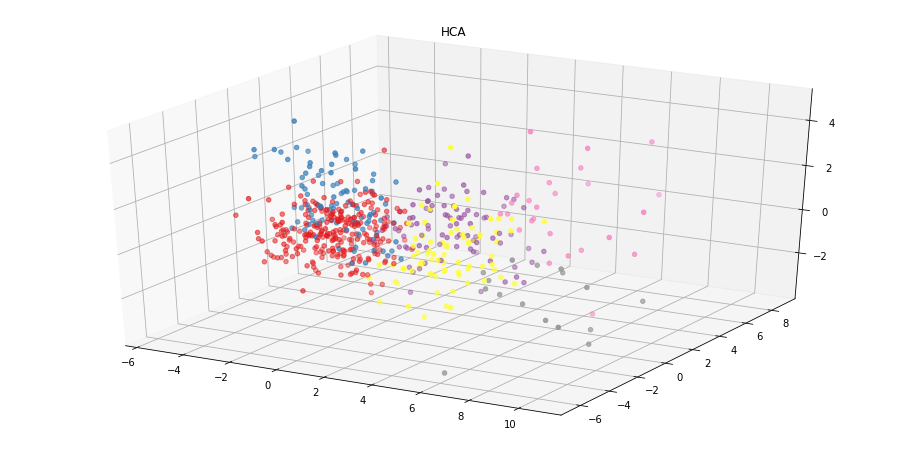

In [612]:
fig3 = plt.figure(figsize=(16, 8))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(pca_df['principal component 1'], pca_df['principal component 2'], pca_df['principal component 3'], c=cluster.labels_, cmap=plt.cm.Set1)
ax3.set_title('HCA')

Text(0.5, 0.92, 'Original')

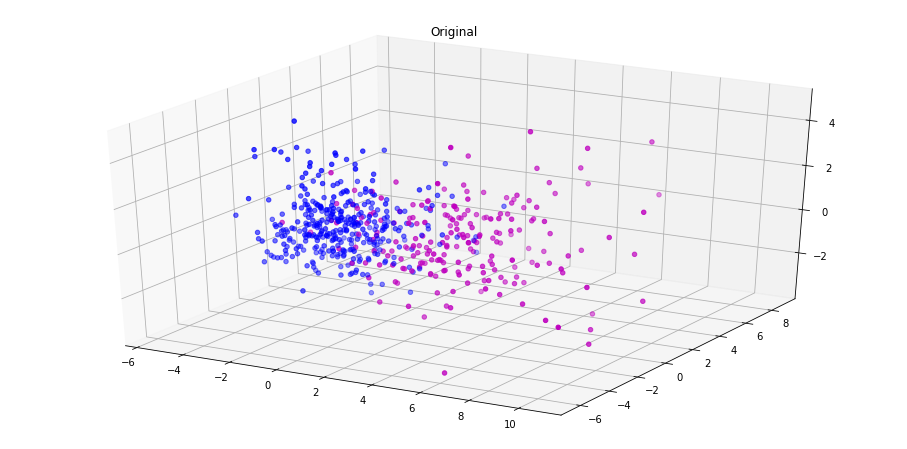

In [613]:
fig4 = plt.figure(figsize=(16, 8))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(principal_df['principal component 1'], principal_df['principal component 2'], principal_df['principal component 3'], c=principal_df['diagnosis'])
ax4.set_title('Original')